# Before part a

In [43]:
import pandas as pd

FILE_PATH_RATINGS = '/content/Netflix_Ratings.csv'

Netflix_Ratings = pd.read_csv(FILE_PATH_RATINGS)
Netflix_Ratings.head()

,customer ID,movie ID,rating 1-5
0,4,1,4
1,44,1,4
2,55,1,5
3,57,1,1
4,68,1,4


In [44]:
FILE_PATH_MOVIES = '/content/Netflix_Movies.csv'

Netflix_Movies = pd.read_csv(FILE_PATH_MOVIES)
Netflix_Movies.head()

,Movie_ID,Year,Name
0,1,1994,Immortal Beloved
1,2,1995,Jade
2,3,1995,Congo
3,4,2002,Mostly Martha
4,5,1995,Star Trek: Voyager: Season 1


In [45]:
movie_code_to_name = {row['Movie_ID']: row['Name'] for index, row in Netflix_Movies.iterrows()}
movie_code_to_name

{1: 'Immortal Beloved',
 2: 'Jade',
 3: 'Congo',
 4: 'Mostly Martha',
 5: 'Star Trek: Voyager: Season 1',
 6: 'The Chorus',
 7: 'Missing in Action 2: The Beginning / Missing in Action 3: Braddock',
 8: 'Death to Smoochy',
 9: 'X2: X-Men United',
 10: 'Taking Lives',
 11: 'North by Northwest',
 12: 'The Avengers',
 13: 'King of the Hill: Season 1',
 14: 'Dogma',
 15: 'Tremors 4: The Legend Begins',
 16: 'The Deal',
 17: 'Saturday Night Live: The Best of Dana Carvey',
 18: 'The Unsinkable Molly Brown',
 19: 'Untamed Heart',
 20: 'Rabbit-Proof Fence',
 21: 'The Twilight Zone: Vol. 12',
 22: 'The Matrix: Revolutions',
 23: 'Frida',
 24: 'A Thousand Acres',
 25: "The Hitchhiker's Guide to the Galaxy",
 26: 'American Beauty',
 27: 'Highlander: Season 4',
 28: 'Shanghai Triad',
 29: 'Unleashed',
 30: 'Saturday Night Live: The Best of Will Ferrell 2',
 31: "Todd McFarlane's Spawn",
 32: 'Mr. Magoo',
 33: 'The Poseidon Adventure',
 34: "Foyle's War: Set 2",
 35: 'Dead Man on Campus',
 36: 'My B

In [46]:
customer_id = Netflix_Ratings['customer ID'].unique()
movie_id = Netflix_Ratings['movie ID'].unique()

raw_data = pd.DataFrame(index=customer_id, columns=movie_id)

for index, row in Netflix_Ratings.iterrows():
  raw_data.loc[row['customer ID'], row['movie ID']] = row['rating 1-5']

raw_data.head()

,1,2,3,4,5,6,7,8,9,10,...,130,131,132,133,134,135,136,137,138,139
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,4,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,...,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55,5,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
68,4,NaN,NaN,NaN,NaN,4,NaN,4,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN


# Part a

In [47]:
import numpy as np

#inputs the mean of the movie rating, and returns the codes of the corresponding movies
feature_mean_to_movie_codes = {}
#the means of each of the movie ratings
feature_means = []

#input the number of votes per movie, and returns the codes of the corresponding movies
feature_votes_to_movie_codes = {}
#the num votes each movie received
feature_votes = []

#indexes through the movie codes (columns)
for col in raw_data.columns:
  feature_mean = np.mean(raw_data[col])
  feature_vote = raw_data[col].notna().sum()

  #this is to account for movies with the same mean rating
  if feature_mean in feature_mean_to_movie_codes:
    feature_mean_to_movie_codes[feature_mean].append(col)
  else:
    feature_mean_to_movie_codes[feature_mean] = [col]

  #this is to account for movies with the same number of votes
  if feature_vote in feature_votes_to_movie_codes:
    feature_votes_to_movie_codes[feature_vote].append(col)
  else:
    feature_votes_to_movie_codes[feature_vote] = [col]

  feature_means.append(feature_mean)
  feature_votes.append(feature_vote)

#smallest and largest mean ratings
min_feature_mean = np.min(feature_means)
max_feature_mean = np.max(feature_means)

#smallest and largest number of votes
min_feature_vote = np.min(feature_votes)
max_feature_vote = np.max(feature_votes)

#codes of the movies with the smallest and largest mean ratings
min_mean_codes = feature_mean_to_movie_codes[min_feature_mean]
max_mean_codes = feature_mean_to_movie_codes[max_feature_mean]

#codes of the movies with the smallest and largest number of votes
min_vote_codes = feature_votes_to_movie_codes[min_feature_vote]
max_vote_codes = feature_votes_to_movie_codes[max_feature_vote]

"""
if there is more than one movie with the same number of votes,
or with the same mean, or if there is more than one person with the same number
of ratings, then all of them are printed. Else, just the one.
"""
if len(min_mean_codes) > 1:
  for i in range(len(min_mean_codes)):
    print('The movie with the smallest mean rating is'
      , f'{movie_code_to_name[min_mean_codes]} with a'
      , f'mean of {min_feature_mean}')

else:
  print('The movie with the smallest mean rating is'
    , f'{movie_code_to_name[min_mean_codes[0]]} with a'
    , f'mean of {min_feature_mean}')

if len(max_mean_codes) > 1:
  for i in range(len(max_mean_codes)):
    print('The movie with the largest mean rating is'
      , f'{movie_code_to_name[max_mean_codes[i]]} with a'
      , f'mean of {max_feature_mean}')

else:
  print('The movie with the largest mean rating is'
    , f'{movie_code_to_name[max_mean_codes[0]]} with a'
    , f'mean of {max_feature_mean}')

if len(min_vote_codes) > 1:
  for i in range(len(min_vote_codes)):
    print('The movie with the smallest number of votes is'
      , f'{movie_code_to_name[min_vote_codes[i]]} with'
      , f'{min_feature_vote} votes')

else:
  print('The movie with the smallest number of votes is'
    , f'{movie_code_to_name[min_vote_codes[0]]} with'
    , f'{min_feature_vote} votes')

if len(max_vote_codes) > 1:
  for i in range(len(max_vote_codes)):
    print('The movie with the most number of votes is'
      , f'{movie_code_to_name[max_vote_codes[i]]} with'
      , f'{max_feature_vote} votes')

else:
  print('The movie with the most number of votes is'
    , f'{movie_code_to_name[max_vote_codes[0]]} with'
    , f'{max_feature_vote} votes')

#number of votes each user makes
user_votes = []

for index, row in raw_data.iterrows():
  #appends number of votes made by user to user_votes
  user_votes.append(row.notna().sum())

#min and max number of votes made by individual users
min_val_votes = np.min(user_votes)
max_val_votes = np.max(user_votes)

"""
we will collect the user_ids of each user who made the highest/lowest number of
votes
"""
indeces_of_min_votes = []
indeces_of_max_votes = []

for i, user_vote in enumerate(user_votes):
  if (min_val_votes == user_vote):
    indeces_of_min_votes.append(i)
  elif (max_val_votes == user_vote):
    indeces_of_max_votes.append(i)

#user ids of users with min/max number of votes
min_vote_users = [raw_data.index[i] for i in indeces_of_min_votes]
max_vote_users = [raw_data.index[i] for i in indeces_of_max_votes]

print('The user(s) with the smallest number of ratings are:'
  , f'{min_vote_users} with {min_val_votes} votes')
print('The user(s) with the largest number of ratings are:'
  , f'{max_vote_users} with {max_val_votes} votes')

The movie with the smallest mean rating is The Avengers with a mean of 2.3242574257425743
The movie with the largest mean rating is Inu-Yasha with a mean of 4.533980582524272
The movie with the smallest number of votes is Inu-Yasha with 103 votes
The movie with the most number of votes is American Beauty with 10197 votes
The user(s) with the smallest number of ratings are: [1988, 2662, 1562, 4600, 8752, 9335, 7579, 6976, 10564, 11343, 1630, 13567, 109, 1329, 1522, 13870, 4191, 4579, 5119, 1935, 14018] with 1 votes
The user(s) with the largest number of ratings are: [11468] with 131 votes


# Before part b

In [78]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

"""
calculates the objective, where we only consider the entries that were not
empty in the original dataset
"""
def objective(X_tilde):
  #I read that doing arithmetic with entries with NaN values just returns
  #another NaN value, so this should be fine
  return np.nansum((raw_data - X_tilde)**2)


"""
computes pca on the inputted matrix, then multiplies scores with loadings to
approximate the original matrix, and then adds the column means back to account
for initial centering
"""
def matrix_completion(X_tilde, n_components):
  pca = PCA(n_components=n_components)
  A = pca.fit_transform(X_tilde)
  B = pca.components_

  return A @ B + np.nanmean(X_tilde, axis=0)


"""
returns a matrix that updates the empty entries in raw_data with whatever
corresponding values are in X_tilde_in, the input matrix
"""
def update_entries(X_tilde_in):
  X_tilde_out = np.where(pd.isnull(raw_data), X_tilde_in, raw_data)
  X_tilde_out = np.clip(X_tilde_out, 1, 5)

  return X_tilde_out


obj_per_iteration = []

col_means = np.nanmean(raw_data, axis=0)
col_means_block = np.tile(col_means, (len(raw_data), 1))

X_tilde_0 = update_entries(col_means_block)
X_tilde = matrix_completion(X_tilde_0, 10)
for i in range(500):
  X_tilde = update_entries(X_tilde)
  X_tilde = matrix_completion(X_tilde, 10)
  obj = objective(X_tilde)
  obj_per_iteration.append(obj)
  print(f'objective value for iteration {i+1}: {obj}')


objective value for iteration 1: 96473.06293306871
objective value for iteration 2: 89355.52179058875
objective value for iteration 3: 83976.76558311092
objective value for iteration 4: 79782.0986701897
objective value for iteration 5: 76423.86500403844
objective value for iteration 6: 73684.09801563346
objective value for iteration 7: 71409.45750229013
objective value for iteration 8: 69491.92083940875
objective value for iteration 9: 67850.61183869482
objective value for iteration 10: 66426.40150626903
objective value for iteration 11: 65175.81850350303
objective value for iteration 12: 64066.33220065573
objective value for iteration 13: 63072.92812387574
objective value for iteration 14: 62176.728462035586
objective value for iteration 15: 61362.58559466186
objective value for iteration 16: 60618.66328446305
objective value for iteration 17: 59935.830643907284
objective value for iteration 18: 59306.18673761495
objective value for iteration 19: 58723.63085175244
objective value for 

# Part b

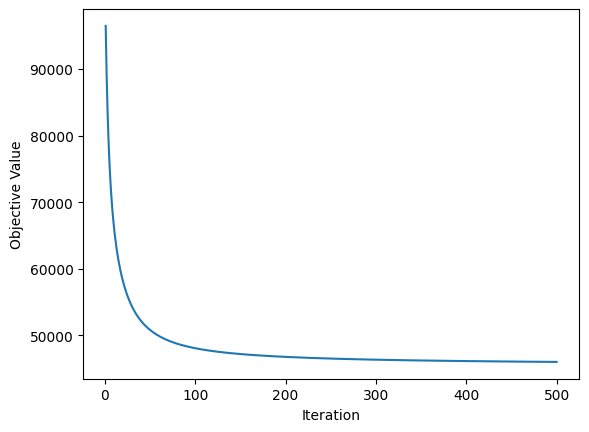

In [79]:
fig, ax = plt.subplots()
ax.plot([i for i in range(1, 501)], obj_per_iteration)
ax.set_xlabel('Iteration')
ax.set_ylabel('Objective Value')

plt.show()

According to the code output itself, it nearly, neeeearly reaches exactly 46k. This matches the graph, which clearly goes below 50k.

# Part c

In [80]:
#Im doing this just to be safe and not alter the original
X_tilde_copy = X_tilde.copy()

In [91]:
X_tilde_df = pd.DataFrame(X_tilde_copy, columns=range(1,140))
X_tilde_df.head()

,1,2,3,4,5,6,7,8,9,10,...,130,131,132,133,134,135,136,137,138,139
0,3.399702,2.768182,1.271826,4.465701,2.136742,3.439146,2.08985,3.811931,4.807308,0.999222,...,3.756287,1.658424,3.441973,3.039571,4.910558,2.815597,3.503378,3.152011,4.725434,3.72208
1,4.137986,3.680787,2.796975,3.634205,3.56399,3.530655,2.624274,3.579859,4.48668,3.481132,...,3.583817,3.735705,4.894623,3.544249,4.355839,4.648572,4.732705,3.902632,3.098511,4.250459
2,4.65212,1.589502,0.881217,4.952814,4.262886,4.105364,1.593311,2.823245,4.161757,1.059057,...,4.192608,3.699721,3.440667,3.05161,4.502676,4.52281,3.029232,1.62608,3.430487,4.836164
3,0.96125,1.524585,1.282974,1.529153,0.928042,2.00314,0.833019,1.085698,1.283015,1.690859,...,1.844891,1.028425,1.624749,1.3335,3.440781,1.760587,1.722074,1.448496,1.589932,2.073967
4,3.826951,2.841917,1.640908,4.343725,4.594584,4.246351,1.131025,3.473741,4.263482,3.163586,...,2.958039,2.939847,1.332302,4.19755,4.350361,1.709423,2.686801,3.056774,3.346867,2.728657


In [93]:
#inputs the mean of the movie rating, and returns the codes of the corresponding movies
feature_mean_to_movie_codes_tilde = {}
#the means of each of the movie ratings
feature_means_tilde = []

#indexes through the movie codes (columns)
for col in X_tilde_df.columns:
  feature_mean_tilde = np.mean(X_tilde_df[col])

  #this is to account for movies with the same mean rating
  if feature_mean_tilde in feature_mean_to_movie_codes_tilde:
    feature_mean_to_movie_codes_tilde[feature_mean_tilde].append(col)
  else:
    feature_mean_to_movie_codes_tilde[feature_mean_tilde] = [col]

  feature_means_tilde.append(feature_mean_tilde)

#smallest and largest mean ratings
min_feature_mean_tilde = np.min(feature_means_tilde)
max_feature_mean_tilde = np.max(feature_means_tilde)

#codes of the movies with the smallest and largest mean ratings
min_mean_codes_tilde = feature_mean_to_movie_codes_tilde[min_feature_mean_tilde]
max_mean_codes_tilde = feature_mean_to_movie_codes_tilde[max_feature_mean_tilde]

"""
if there is more than one movie with the same mean, then all of them are
printed. Else, just the one.
"""
if len(min_mean_codes_tilde) > 1:
  for i in range(len(min_mean_codes_tilde)):
    print('The movie with the smallest mean rating in the reconstructed data is'
      , f'{movie_code_to_name[min_mean_codes_tilde]} with a'
      , f'mean of {min_feature_mean}')

else:
  print('The movie with the smallest mean rating in the reconstructed data is'
    , f'{movie_code_to_name[min_mean_codes_tilde[0]]} with a'
    , f'mean of {min_feature_mean}')

if len(max_mean_codes_tilde) > 1:
  for i in range(len(max_mean_codes_tilde)):
    print('The movie with the largest mean rating in the reconstructed data is'
      , f'{movie_code_to_name[max_mean_codes_tilde[i]]} with a'
      , f'mean of {max_feature_mean}')

else:
  print('The movie with the largest mean rating in the reconstructed data is'
    , f'{movie_code_to_name[max_mean_codes_tilde[0]]} with a'
    , f'mean of {max_feature_mean}')

The movie with the smallest mean rating in the reconstructed data is American Psycho 2 with a mean of 2.3242574257425743
The movie with the largest mean rating in the reconstructed data is Inu-Yasha with a mean of 4.533980582524272


# Part d

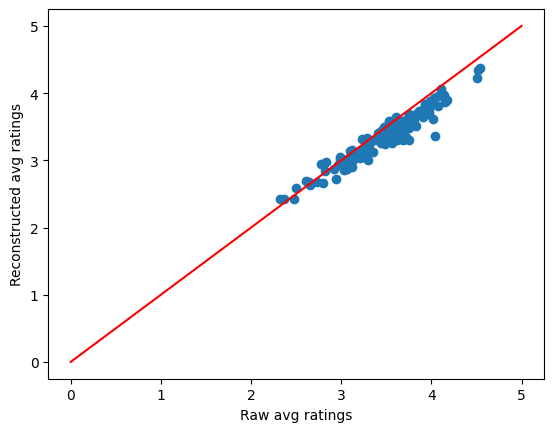

In [94]:
avg_ratings_raw = np.mean(raw_data, axis=0)
avg_ratings_reconstructed = np.mean(X_tilde_copy, axis=0)

fig, ax = plt.subplots()

ax.scatter(avg_ratings_raw, avg_ratings_reconstructed)
ax.set_xlabel('Raw avg ratings')
ax.set_ylabel('Reconstructed avg ratings')
ax.plot(np.linspace(0, 5, 100), np.linspace(0, 5, 100), 'r')

plt.show()

In [95]:
diff = avg_ratings_raw - avg_ratings_reconstructed

max_pos_diff = np.max(diff)
max_neg_diff = np.min(diff)

most_overrated_index = np.where(diff == max_pos_diff)[0]
most_underrated_index = np.where(diff == max_neg_diff)[0]

if len(most_overrated_index) > 1:
  print('The most overrated movies are:')
  for i in range(len(most_overrated_index)):
    print(f'{movie_code_to_name[most_overrated_index[i]]}')

else:
  print(f'The most overrated movie is: {movie_code_to_name[most_overrated_index[0]]}')

if len(most_underrated_index) > 1:
  print('The most underrated movies are:')
  for i in range(len(most_underrated_index)):
    print(f'{movie_code_to_name[most_underrated_index[i]]}')

else:
  print(f'The most underrated movie is: {movie_code_to_name[most_underrated_index[0]]}')

The most overrated movie is: Inu-Yasha
The most underrated movie is: The Big Blue


# Before part e

In [98]:
"""
Im overloading this function I used in a previous cell, so that now I can access
the matrix containing the loading vectors, B
"""
def matrix_completion(X_tilde, n_components):
  pca = PCA(n_components=n_components)
  A = pca.fit_transform(X_tilde)
  B = pca.components_

  return A @ B + np.nanmean(X_tilde, axis=0), B



X2_tilde_0 = update_entries(col_means_block)
X2_tilde, B = matrix_completion(X2_tilde_0, 2)
for i in range(500):
  X2_tilde = update_entries(X2_tilde)
  X2_tilde, B = matrix_completion(X2_tilde, 2)
  obj = objective(X2_tilde)
  obj_per_iteration.append(obj)
  print(f'objective value for iteration {i+1}: {obj}')

objective value for iteration 1: 144412.24165712396
objective value for iteration 2: 140067.2116832354
objective value for iteration 3: 137228.160648371
objective value for iteration 4: 135164.26743441273
objective value for iteration 5: 133572.03428218566
objective value for iteration 6: 132295.8038694517
objective value for iteration 7: 131244.40229439136
objective value for iteration 8: 130359.98935582234
objective value for iteration 9: 129603.62742285067
objective value for iteration 10: 128948.05532802916
objective value for iteration 11: 128373.31949749941
objective value for iteration 12: 127864.71538293581
objective value for iteration 13: 127411.14313346762
objective value for iteration 14: 127004.083031823
objective value for iteration 15: 126636.46401988964
objective value for iteration 16: 126302.56034423652
objective value for iteration 17: 125997.8012939533
objective value for iteration 18: 125718.49125120227
objective value for iteration 19: 125461.45710409692
objective

In [105]:
B_df = pd.DataFrame(B.T, index=range(1,140), columns=['PC 1','PC 2'])
B_df.head()

,PC 1,PC 2
1,0.091351,0.031969
2,0.087547,-0.094843
3,0.073036,-0.135555
4,0.081005,0.026278
5,0.076274,-0.074514


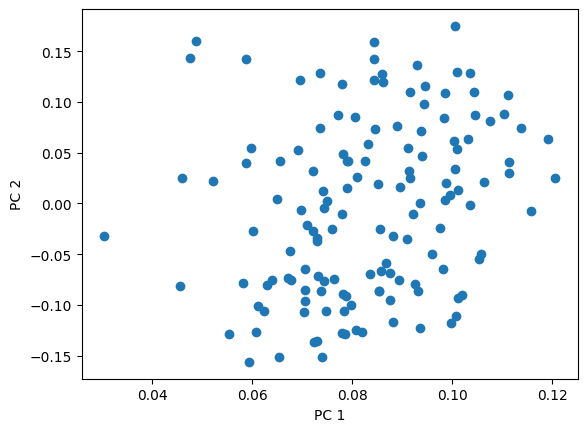

In [107]:
fig, ax = plt.subplots()

ax.scatter(B_df['PC 1'], B_df['PC 2'])
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

plt.show()

# Part e

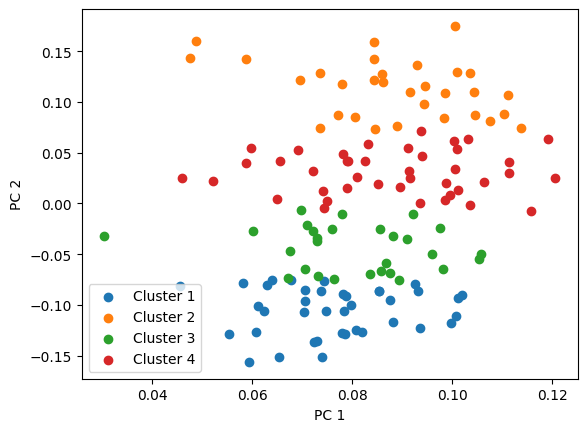

In [118]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters=4)
B_km = km.fit_predict(B_df)

mask0 = (B_km == 0)
mask1 = (B_km == 1)
mask2 = (B_km == 2)
mask3 = (B_km == 3)

fig, ax = plt.subplots()

ax.scatter(B_df[mask0]['PC 1'], B_df[mask0]['PC 2'], label='Cluster 1')
ax.scatter(B_df[mask1]['PC 1'], B_df[mask1]['PC 2'], label='Cluster 2')
ax.scatter(B_df[mask2]['PC 1'], B_df[mask2]['PC 2'], label='Cluster 3')
ax.scatter(B_df[mask3]['PC 1'], B_df[mask3]['PC 2'], label='Cluster 4')

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.legend()

plt.show()

# Part f

In [123]:
num_cluster_1 = np.count_nonzero(B_km == 0)
num_cluster_2 = np.count_nonzero(B_km == 1)
num_cluster_3 = np.count_nonzero(B_km == 2)
num_cluster_4 = np.count_nonzero(B_km == 3)

min_count = np.min([num_cluster_1, num_cluster_2, num_cluster_3, num_cluster_4])

if num_cluster_1 == min_count:
  print('Cluster 1 has the least movies')
if num_cluster_2 == min_count:
  print('Cluster 2 has the least movies')
if num_cluster_3 == min_count:
  print('Cluster 3 has the least movies')
if num_cluster_4 == min_count:
  print('Cluster 4 has the least movies')

Cluster 3 has the least movies


In [125]:
print('Movies in cluster 3 (the smallest cluster):\n')

for i in B_df[mask2].index:
  print(f'{movie_code_to_name[i]}')

Movies in cluster 3 (the smallest cluster):

Star Trek: Voyager: Season 1
X2: X-Men United
King of the Hill: Season 1
A Thousand Acres
Unleashed
Todd McFarlane's Spawn
The Poseidon Adventure
Bill Cosby: Himself
Krull
A Beautiful Mind
Leprechaun
A Lesson Before Dying
Psycho
Cirque du Soleil: Dralion
The Secret Garden
Justice League: Justice on Trial
The Emperor's New Groove
D.A.R.Y.L.
Elf
The Wind and the Lion
American Psycho 2
Cousins
The Flying Tigers
Mighty Quinn
Pete's Dragon
Chocolat
Good Guys Wear Black
Inu-Yasha


I see a lot of action, sci fi, superheroes. Seems like what might stereotypically be "boys" stuff.